## Import and Setup Data Set

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# set print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns',100)

In [3]:
# import data
df = pd.read_csv(r"SouthGermanCredit/SouthGermanCredit.asc", header=0, delimiter=r"\s+")

# inspect import
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


In [4]:
# check data types of import 
df.dtypes

laufkont    int64
laufzeit    int64
moral       int64
verw        int64
hoehe       int64
sparkont    int64
beszeit     int64
rate        int64
famges      int64
buerge      int64
wohnzeit    int64
verm        int64
alter       int64
weitkred    int64
wohn        int64
bishkred    int64
beruf       int64
pers        int64
telef       int64
gastarb     int64
kredit      int64
dtype: object

In [5]:
# remap columns from German to English
englishCols = {
    "laufkont":"status",
    "laufzeit":"duration",
    "moral":"credit_history",
    "verw":"purpose",
    "hoehe":"amount",
    "sparkont":"savings",
    "beszeit":"employment_duration",
    "rate":"installment_rate",
    "famges":"personal_status_sex",
    "buerge":"other_debtors",
    "verm":"property",
    "wohnzeit":"present_residence",
    "verm ":"property",
    "alter":"age",
    "weitkred":"other_installment_plans",
    "wohn":"housing",
    "bishkred":"number_credits",
    "beruf":"job",
    "pers":"people_liable",
    "telef":"telephone",
    "gastarb":"foreign_worker",
    "kredit":"credit_risk"
}

# apply rename in place
df.rename(columns=englishCols, inplace=True)

# check column rename
df.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

## Exploratory Data Analysis

In [6]:
# describe dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
status,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_history,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
purpose,1000.0,2.828,2.744439,0.0,1.0,2.0,3.00,10.0
amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
savings,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0
employment_duration,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
personal_status_sex,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0
other_debtors,1000.0,1.145,0.477706,1.0,1.0,1.0,1.00,3.0


Based on the summary statistics above, each column has 1,000 records and no missingness. There is also many different fields with categorical data and only a few fields that are continuous. 

As an example of a categorical field is job. In this variable: 
1. unemployed/unskilled - non-resident
2. unskilled - resident
3. skilled employee/official
4. manager/self-empl./highly qualif. employee 

Other definitions for categorical variables could be seen in the SouthGermanCredit/codetable.txt file. 

Continuous variables, like amount, is not binned. 

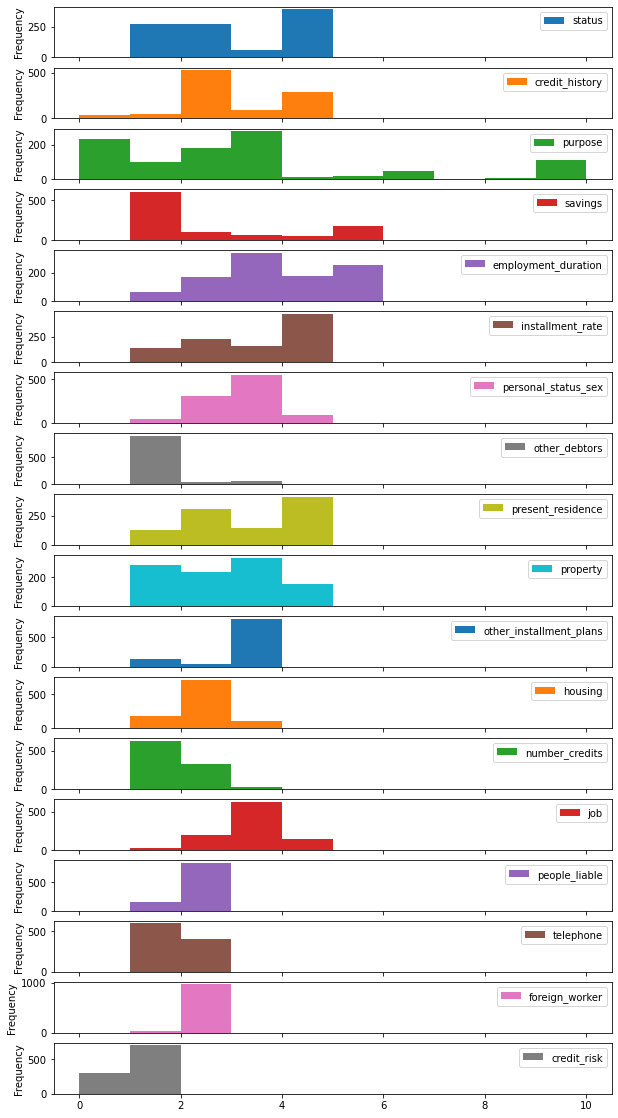

In [7]:
# get historgram of categorical data with low levels of cardinality
# for this example, we'll exclude amount, age, and duration
df.loc[:, ~df.columns.isin(['amount','age','duration'])].plot.hist(subplots=True, legend=True,figsize=(10, 20))
plt.show()

The histograms above show that nearly all of the variables have inbalanced classes. If one of these variables were a response variable in a supervised classification problem, techniques like SMOTE, oversampling, or undersampling would need to be employed. 

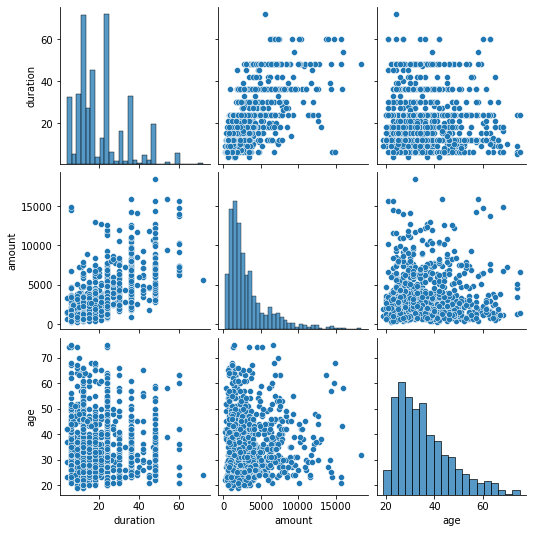

In [8]:
# pairplot to analyze interaction or trends between continuous variables 
sns.pairplot(df[['duration','amount','age']])
plt.show()

Looking at the pairplot, there is a positive correlation between duration and amount, which, on the surface, makes sense. Often in lending, larger loan amounts have a longer term which benefits the borrower as the monthly payments will be lower, however, this poses a unique risk to a bank from both a default and interest risk rate perspective. 

There doesn't appear to be a strong relationship between age-amount or age-duration. 

## Gower Clustering 

In [9]:
# create the distance matrix
import gower

targetCols = ['duration', 'credit_history', 'purpose', 'amount', 'personal_status_sex', 'present_residence','job'] 

distance_matrix = gower.gower_matrix(df[targetCols].astype(np.float64)) # select subset of variables

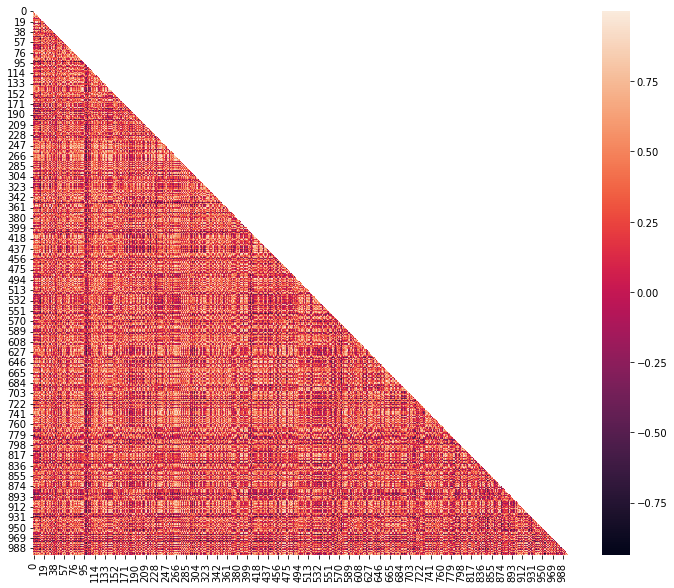

In [10]:
# Compute the correlation matrix
# source: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = pd.DataFrame(distance_matrix).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask)
plt.show()

In [11]:
# use precomputed distance matrix for dissimilarity matrix for density based clustering
from sklearn.cluster import DBSCAN

# Configuring the parameters of the clustering algorithm
dbscan_cluster = DBSCAN(eps=0.5, 
                        min_samples=5, 
                        metric="precomputed")

# Fitting the clustering algorithm
dbscan_cluster.fit(distance_matrix)

# Adding the results to a new column in the dataframe
df["cluster_dbscan"] = dbscan_cluster.labels_

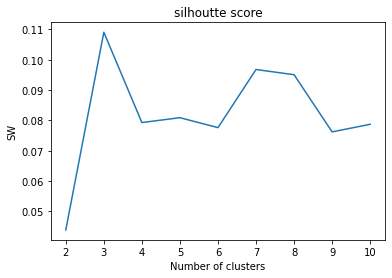

In [12]:
# silouette method for dataset
# source: https://www.youtube.com/watch?v=L1ykPtlonAU
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids

sw = [] # empty list for silhouette width

for i in range(2, 11): 
    kMedoids = KMedoids(n_clusters = i, metric="precomputed", random_state = 0)
    kMedoids.fit(distance_matrix)
    y_kmed = kMedoids.fit_predict(distance_matrix)
    silhouette_avg = silhouette_score(distance_matrix, y_kmed)
    sw.append(silhouette_avg)

plt.plot(range(2,11), sw)
plt.title("silhoutte score")
plt.xlabel('Number of clusters')
plt.ylabel('SW') # within cluster sum of squares, silhouette width
plt.show()

In [13]:
# use KMedoids to cluster data
kmedoids_cluster = KMedoids(n_clusters = 3, metric="precomputed")
kmedoids_cluster.fit(distance_matrix)

df["cluster_kmedoids"] = kmedoids_cluster.labels_ 

## Inspect Results

# print dataframe
df.head()

DB Scan Results:
0    1000
Name: cluster_dbscan, dtype: int64 



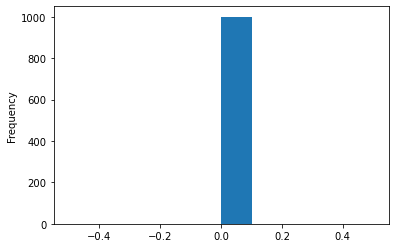

KMedoids Results:
0    438
1    375
2    187
Name: cluster_kmedoids, dtype: int64 



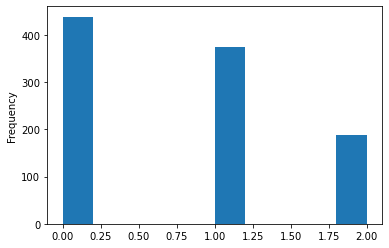

In [14]:
# inspect results
print('DB Scan Results:')
print(df['cluster_dbscan'].value_counts(),'\n')
df['cluster_dbscan'].plot.hist()
plt.show()

print('KMedoids Results:')
print(df['cluster_kmedoids'].value_counts(),'\n')
df['cluster_kmedoids'].plot.hist()
plt.show()

In [15]:
# initialize an empty list that will be used for numerous types of categorical remapping from integers to string values
remapList = []

# remap for status
statusMap = {
    1:"no checking account",
    2:"< 0 DM",
    3: "0<= ... < 200 DM",
    4:">= 200 DM / salary for at least 1 year"
}
remapList.append(['status', statusMap])

# remap for credit_history
creditHistoryMap = {
    0:"delay in paying off in the past",
    1:"critical account/other credits elsewhere",
    2:"no credits taken/all credits paid back duly",
    3:"existing credits paid back duly till now",
    4:"all credits at this bank paid back duly"
}
remapList.append(['credit_history', creditHistoryMap])                

# remap for purpose
purposeMap = {
    0:"others",
    1:"car (new)",
    2:"car (used)",
    3:"furniture/equipment",
    4:"radio/television",
    5:"domestic appliances",
    6:"repairs",
    7:"education",          
    8:"vacation",
    9:"retraining",
    10:"business"
}
remapList.append(['purpose', purposeMap])

# remap for savings
savingsMap = {
    1:"unknown/no savings account",
    2:"<  100 DM",
    3:"100 <= ... <  500 DM",
    4:"500 <= ... < 1000 DM",
    5:">= 1000 DM"
}
remapList.append(['savings',savingsMap])        

# remap for employment_duration
employmentDurationMap = {
    1:"unemployed",
    2:"< 1 yr",
    3:"1 <= ... < 4 yrs",
    4:"4 <= ... < 7 yrs",
    5:">= 7 yrs"
}
remapList.append(['employment_duration', employmentDurationMap])                   

# remap for installment_rate
installmentRateMap= {
    1:">= 35",
    2:"25 <= ... < 35",
    3:"20 <= ... < 25",
    4:"< 20"
}
remapList.append(['installment_rate', installmentRateMap])      

# remap for personal_status_sex
personalStatusSexMap = {
     1:"male : divorced/separated",
     2:"female : non-single or male : single",
     3:"male : married/widowed",
     4:"female : single"
}
remapList.append(['personal_status_sex', personalStatusSexMap])                           

# remap for other_debtors
otherDebtorsMap = {
    1:"none",
    2:"co-applicant",
    3:"guarantor"   
}
remapList.append(['other_debtors', otherDebtorsMap])

# remap for present_residence
presentResidenceMap={
    1:"< 1 yr",
    2:"1 <= ... < 4 yrs",
    3 :"4 <= ... < 7 yrs", 
    4 :">= 7 yrs"
}
remapList.append(['present_residence', presentResidenceMap])

# remap for property
propertyMap = {
    1:"unknown / no property",
    2:"car or other",
    3:"building soc. savings agr./life insurance",
    4:"real estate"
}                                         
remapList.append(['property', propertyMap])        

# remap for other_installment_plans
installmentPlanMap = {
    1:"bank",
    2:"stores",
    3:"none"  
}
remapList.append(['other_installment_plans', installmentPlanMap])

# remap for housing
housingMap = {
    1:"for free",
    2:"rent",
    3:"own"     
}
remapList.append(['housing', housingMap])

# remap for number_credits
numCreditsMap = {
    1:"1",
    2:"2-3",
    3:"4-5",
    4:">= 6"
}
remapList.append(['number_credits', numCreditsMap])
 
# remap for job
jobMap = {
    1:"unemployed/unskilled - non-resident",
    2:"unskilled - resident",
    3:"skilled employee/official",
    4:"manager/self-empl./highly qualif. employee"
}
remapList.append(['job', jobMap])

# remap for people_liable              
peopleLiableMap = {
    1:"3 or more",
    2:"0 to 2" 
 }
remapList.append(['people_liable', peopleLiableMap])

# remap for telephone
telephoneMap = {
    1:"no",
    2:"yes (under customer name)"
}
remapList.append(['telephone', telephoneMap])

# remap for foreign_worker
foreignWorkerMap = {
    1:"yes",
    2:"no" 
}
remapList.append(['foreign_worker', foreignWorkerMap])

# remap for credit_risk
creditRiskMap = {
    0:"bad",
    1:"good"
}
remapList.append(['credit_risk', creditRiskMap])

# check structure of remapList
for i in remapList:
    print(i[0], i[1].items())

status dict_items([(1, 'no checking account'), (2, '< 0 DM'), (3, '0<= ... < 200 DM'), (4, '>= 200 DM / salary for at least 1 year')])
credit_history dict_items([(0, 'delay in paying off in the past'), (1, 'critical account/other credits elsewhere'), (2, 'no credits taken/all credits paid back duly'), (3, 'existing credits paid back duly till now'), (4, 'all credits at this bank paid back duly')])
purpose dict_items([(0, 'others'), (1, 'car (new)'), (2, 'car (used)'), (3, 'furniture/equipment'), (4, 'radio/television'), (5, 'domestic appliances'), (6, 'repairs'), (7, 'education'), (8, 'vacation'), (9, 'retraining'), (10, 'business')])
savings dict_items([(1, 'unknown/no savings account'), (2, '<  100 DM'), (3, '100 <= ... <  500 DM'), (4, '500 <= ... < 1000 DM'), (5, '>= 1000 DM')])
employment_duration dict_items([(1, 'unemployed'), (2, '< 1 yr'), (3, '1 <= ... < 4 yrs'), (4, '4 <= ... < 7 yrs'), (5, '>= 7 yrs')])
installment_rate dict_items([(1, '>= 35'), (2, '25 <= ... < 35'), (3, '2

In [16]:
# get semantic representation of clusters
dfLabeled = df.copy()

# re-assign categorical data with labels
for i in remapList:
    dfLabeled[i[0]] = dfLabeled[i[0]].map(i[1])

# inspect result
print(dfLabeled.shape)
dfLabeled.head(10)

(1000, 23)


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,cluster_dbscan,cluster_kmedoids
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good,0,1
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good,0,0
2,< 0 DM,12,no credits taken/all credits paid back duly,retraining,841,< 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,>= 7 yrs,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good,0,2
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good,0,0
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good,0,1
5,no checking account,10,all credits at this bank paid back duly,others,2241,unknown/no savings account,< 1 yr,>= 35,male : married/widowed,none,4 <= ... < 7 yrs,unknown / no property,48,none,for free,2-3,unskilled - resident,3 or more,no,yes,good,0,2
6,no checking account,8,all credits at this bank paid back duly,others,3398,unknown/no savings account,4 <= ... < 7 yrs,>= 35,male : married/widowed,none,>= 7 yrs,unknown / no property,39,none,rent,2-3,unskilled - resident,0 to 2,no,yes,good,0,1
7,no checking account,6,all credits at this bank paid back duly,others,1361,unknown/no savings account,< 1 yr,25 <= ... < 35,male : married/widowed,none,>= 7 yrs,unknown / no property,40,none,rent,1,unskilled - resident,3 or more,no,yes,good,0,1
8,>= 200 DM / salary for at least 1 year,18,all credits at this bank paid back duly,furniture/equipment,1098,unknown/no savings account,unemployed,< 20,female : non-single or male : single,none,>= 7 yrs,building soc. savings agr./life insurance,65,none,rent,2-3,unemployed/unskilled - non-resident,0 to 2,no,no,good,0,1
9,< 0 DM,24,no credits taken/all credits paid back duly,furniture/equipment,3758,100 <= ... < 500 DM,unemployed,>= 35,female : non-single or male : single,none,>= 7 yrs,real estate,23,none,for free,1,unemployed/unskilled - non-resident,0 to 2,no,no,good,0,1
